<a href="https://colab.research.google.com/github/jerry71867/LLM/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://github.com/shhuangmust/AI/raw/111-2/Google_Stock_Price_Train.csv
!wget https://github.com/shhuangmust/AI/raw/111-2/Google_Stock_Price_Test.csv
#使用 wget 命令下載文件，下載了兩個不同的CSV文件。

--2023-11-09 13:03:33--  https://github.com/shhuangmust/AI/raw/111-2/Google_Stock_Price_Train.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shhuangmust/AI/111-2/Google_Stock_Price_Train.csv [following]
--2023-11-09 13:03:33--  https://raw.githubusercontent.com/shhuangmust/AI/111-2/Google_Stock_Price_Train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63488 (62K) [text/plain]
Saving to: ‘Google_Stock_Price_Train.csv.1’

Google_Stock_Price_ 100%[===================>]  62.00K  --.-KB/s    in 0.07s   

2023-11-09 13:03:34 (883 KB/s) - ‘Google_Stock_Price_Train.csv.1’ saved [63488/63488

In [4]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt  # for 畫圖用
import pandas as pd

# Import the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')  # 讀取訓練集
#使用Pandas的read_csv函數從名為'Google_Stock_Price_Train.csv'的CSV文件中讀取數據，並將其存儲在一個Pandas數據框（DataFrame）中，稱為dataset_train。
training_set = dataset_train.iloc[:, 1:2].values  # 取「Open」欄位值
#選擇dataset_train數據框中的"Open"欄位，使用.iloc方法可以選擇特定的行和列，這裡選擇所有行（:表示所有行）和第2列（索引為1），然後使用.values轉換為NumPy數組，並將其存儲在training_set中。

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
#從Scikit-Learn庫的preprocessing模塊中引入了MinMaxScaler。

sc = MinMaxScaler(feature_range = (0, 1))
#創建了一個MinMaxScaler對象，並指定了縮放的範圍，這裡是(0, 1)，即將數據縮放到0到1之間。
training_set_scaled = sc.fit_transform(training_set)
#使用MinMaxScaler對象sc的fit_transform方法，將training_set中的數據進行縮放，並將結果存儲在training_set_scaled中。

X_train = []   #預測點的前 60 天的資料
y_train = []   #預測點
for i in range(60, 1258):  # 1258 是訓練集總數
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)  # 轉成numpy array的格式，以利輸入 RNN

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#使用NumPy的reshape函數對X_train進行形狀調整，將其變成三維數組，形狀為(樣本數, 時間步長, 特徵數)，這樣就可以作為RNN模型的輸入。


In [5]:
# Import the Keras libraries and packages
from keras.models import Sequential
#導入Keras中的Sequential模型
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
#所需的層類型，包括Dense（全連接層）、LSTM（長短期記憶層）和Dropout（用於正則化的層）。

# Initialising the RNN
regressor = Sequential()
#創建一個名為regressor的Sequential模型。

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units = 1))
#模型的頂部添加了一個全連接層（Dense），它具有一個單元。

# Compiling
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
#編譯模型。我們選擇"adam"作為優化器，使用均方誤差（mean squared error）作為損失函數。

# 進行訓練
regressor.fit(X_train, y_train, epochs = 65, batch_size = 32)
#使用fit函數訓練模型。

Epoch 1/65
38/38 [==============================] - 14s 119ms/step - loss: 0.0365
Epoch 2/65
38/38 [==============================] - 5s 145ms/step - loss: 0.0059
Epoch 3/65
38/38 [==============================] - 5s 120ms/step - loss: 0.0054
Epoch 4/65
38/38 [==============================] - 4s 118ms/step - loss: 0.0054
Epoch 5/65
38/38 [==============================] - 6s 149ms/step - loss: 0.0048
Epoch 6/65
38/38 [==============================] - 4s 118ms/step - loss: 0.0046
Epoch 7/65
38/38 [==============================] - 5s 124ms/step - loss: 0.0053
Epoch 8/65
38/38 [==============================] - 5s 140ms/step - loss: 0.0044
Epoch 9/65
38/38 [==============================] - 4s 118ms/step - loss: 0.0050
Epoch 10/65
38/38 [==============================] - 6s 150ms/step - loss: 0.0042
Epoch 11/65
38/38 [==============================] - 4s 118ms/step - loss: 0.0045
Epoch 12/65
38/38 [==============================] - 5s 122ms/step - loss: 0.0046
Epoch 13/65
38/38 [=====

In [6]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
#讀取測試數據集，其中包含股票價格數據。
real_stock_price = dataset_test.iloc[:, 1:2].values
#從測試數據集中提取實際股票價格（"Open"欄位）。
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
#將訓練集和測試集的"Open"欄位合併成一個總數據集。
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
#提取用於測試的輸入數據。
inputs = inputs.reshape(-1,1)
#將輸入數據整形為一列（1列），確保數據的維度正確。
inputs = sc.transform(inputs) # Feature Scaling
#使用先前定義的MinMaxScaler進行特徵縮放，將數據縮放到[0, 1]的範圍內。

X_test = []
#存儲測試數據的輸入特徵。
for i in range(60, 80):  # timesteps一樣60； 80 = 先前的60天資料+2017年的20天資料
    X_test.append(inputs[i-60:i, 0])
    #將每個時間步長為60的窗口中的數據添加到X_test中。
X_test = np.array(X_test)
#將X_test轉換為NumPy數組。
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
  # Reshape 成 3-dimension
predicted_stock_price = regressor.predict(X_test)
#使用已經訓練好的LSTM模型對測試數據的股票價格進行預測。
predicted_stock_price = sc.inverse_transform(predicted_stock_price)  # to get the original scale


1/1 [==============================] - 2s 2s/step


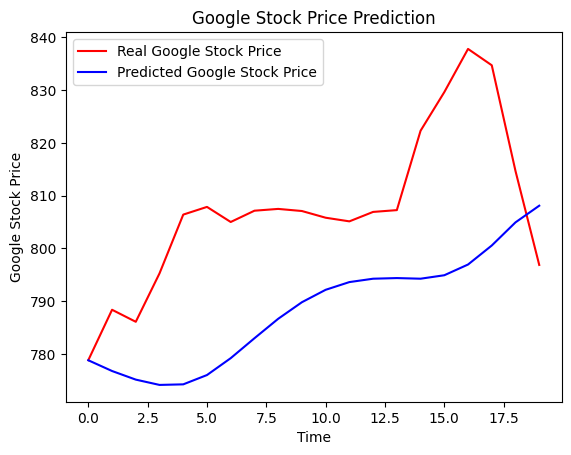

In [7]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')  # 紅線表示真實股價
#將真實股票價格以紅色折線的形式繪製在圖表上，同時添加標籤 "Real Google Stock Price"。
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')  # 藍線表示預測股價
#將預測的股票價格以藍色折線的形式繪製在圖表上，同時添加標籤 "Predicted Google Stock Price"。
plt.title('Google Stock Price Prediction')
#設定圖表的標題為 "Google Stock Price Prediction"。
plt.xlabel('Time')
#設定X軸的標籤為 "Time"。
plt.ylabel('Google Stock Price')
#設定Y軸的標籤為 "Google Stock Price"。
plt.legend()
#顯示圖例，將 "Real Google Stock Price" 和 "Predicted Google Stock Price" 顯示在圖表中。
plt.show()